# One-at-a-Time Sensitivity Analysis: Networks
In this Notebook, one of two sensitivity analyses is conducted. In this one, the model is tested for sensitivity on the type-network model parameter. There are four options: "watts_strogatz", "erdos_renyi", "barabasi_albert", "no_network". These options determine in what way the households are connected to each other in the model. Which one is preferable is based on assumptions and personal beliefs and preferences about networks forming. However, to check if that assumption and choice has influence on the outcome of the model. This Notebook produces output that is further described and elaborated on in the report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Defines the path to the output data produced in SensitivityAnalysis_Networks
sensitivity_analysis_path = r'../output_data/SensitivityAnalysisNetworks.csv'
#Read the path into a dataframe
sensitivity_analysis = pd.read_csv(sensitivity_analysis_path)
#There are columns that have become unnecessary after unpacking them before
#For tidiness, those columns are dropped to keep overview
columns_to_drop = ['AverageDamagePerIncomeLabel', 'EstimatedAverageDamagePerIncomeLabel', 'AverageIncomeToDamageRatio', 'EstimatedAverageIncomeToDamageRatio']
sensitivity_analysis.drop(columns = columns_to_drop, inplace = True)
sensitivity_analysis

,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,TotalAdaptedHouseholds,TotalActualDamage,TotalExpectedDamage,...,EstimatedAverageDamagePerRichHousehold,EstimatedAverageIncomeToDamagePoorHousehold,EstimatedAverageIncomeToDamageMiddleClassHousehold,EstimatedAverageIncomeToDamageRichHousehold,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
0,0,0,0,1000,80,100yr,watts_strogatz,0,0.000000e+00,3.333918e+07,...,80716.074597,3.120445,1.159867,0.906841,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
1,0,0,1,1000,80,100yr,watts_strogatz,82,0.000000e+00,3.030930e+07,...,68421.718051,3.112738,1.057968,0.768714,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
2,0,0,2,1000,80,100yr,watts_strogatz,169,0.000000e+00,2.655789e+07,...,61457.734874,2.981427,0.901153,0.690474,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
3,0,0,3,1000,80,100yr,watts_strogatz,238,0.000000e+00,2.217473e+07,...,49216.075189,2.914300,0.731273,0.552940,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
4,0,0,4,1000,80,100yr,watts_strogatz,269,0.000000e+00,2.031188e+07,...,49216.075189,2.790635,0.641117,0.552940,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16890,399,99,34,1000,80,100yr,no_network,305,0.000000e+00,1.689831e+07,...,57879.973784,1.670103,0.492650,0.664664,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
16891,399,99,35,1000,80,100yr,no_network,306,0.000000e+00,1.687894e+07,...,57879.973784,1.655190,0.492650,0.664664,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
16892,399,99,36,1000,80,100yr,no_network,307,0.000000e+00,1.674576e+07,...,57879.973784,1.655190,0.485922,0.664664,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
16893,399,99,37,1000,80,100yr,no_network,307,0.000000e+00,1.674576e+07,...,57879.973784,1.655190,0.485922,0.664664,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000


First, we start of creating dataframes seperating the full dataframes into dataframes displaying model runs with a specific network. The four networks are: ["watts_strogatz", "erdos_renyi", "barabasi_albert", "no_network"]

We want to analyze the influence of these networks on certain output parameters. Therefore, separating them is necessary to analyse them one by one.

In [3]:
#First, we gather all the runs with "watts_strogatz" network as condition in to a separate dataframe
watts_strogatz = pd.DataFrame()
condition = sensitivity_analysis['network'] == "watts_strogatz"
watts_strogatz = pd.concat([sensitivity_analysis[condition], watts_strogatz], ignore_index=True)

#Second, all the runs with "erdos_renyi" as condition in to a separate dataframe
erdos_renyi = pd.DataFrame()
condition = sensitivity_analysis['network'] == "erdos_renyi"
erdos_renyi = pd.concat([sensitivity_analysis[condition], erdos_renyi], ignore_index=True)

#Third, all the runs with "barabasi_albert" as condition in to a separate dataframe
barabasi_albert = pd.DataFrame()
condition = sensitivity_analysis['network'] == "barabasi_albert"
barabasi_albert = pd.concat([sensitivity_analysis[condition], barabasi_albert], ignore_index=True)

#Lastly, all the runs with "no_network" as condition in to a separate dataframe
no_network = pd.DataFrame()
condition = sensitivity_analysis['network'] == "no_network"
no_network = pd.concat([sensitivity_analysis[condition], no_network], ignore_index=True)

Next, we divide the output under the different income classes to see if there is any difference in KPI there. At last, important model output parameters 'Total Adapated Households' and 'TotalActualDamage' are checked to see if there are more or less households that adapt with different networks and to see if the overall damage is less when using a different network. 

# Poor Households

In [4]:
#First, the income to damage ratio for poor households get isolated from the dataframe from before
estimated_ratio_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageIncomeToDamagePoorHousehold']]
estimated_ratio_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageIncomeToDamagePoorHousehold']]
estimated_ratio_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageIncomeToDamagePoorHousehold']]
estimated_ratio_no_network = no_network[['RunId', 'Step', 'EstimatedAverageIncomeToDamagePoorHousehold']]

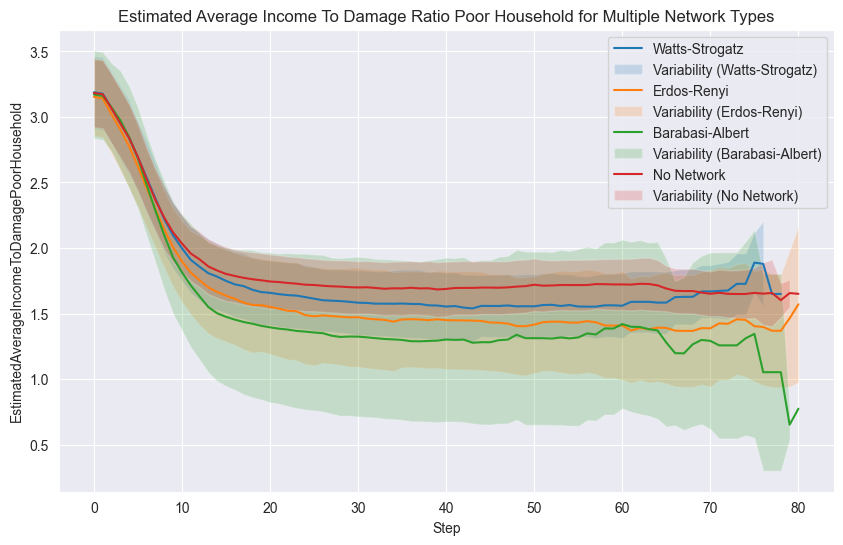

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean and standard deviation for each step in the "watts_strogatz" DataFrame
mean_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].mean()
std_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the "erdos_renyi" DataFrame
mean_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].mean()
std_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the "barabasi_albert" DataFrame
mean_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].mean()
std_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the "no_network" DataFrame
mean_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].mean()
std_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamagePoorHousehold'].std()

# Plot the mean line for the "watts_strogatz" DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the "watts_strogatz" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the "erdos_renyi" DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the "erdos_renyi" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the "barabasi_albert" DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the "barabasi_albert" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the "no_network" DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the "no_network" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageIncomeToDamagePoorHousehold')
ax.set_title('Estimated Average Income To Damage Ratio Poor Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()


In [6]:
#Second, the average damage per household with poor as income class is isolated
estimated_damage_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageDamagePerPoorHousehold']]
estimated_damage_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageDamagePerPoorHousehold']]
estimated_damage_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageDamagePerPoorHousehold']]
estimated_damage_no_network = no_network[['RunId', 'Step', 'EstimatedAverageDamagePerPoorHousehold']]

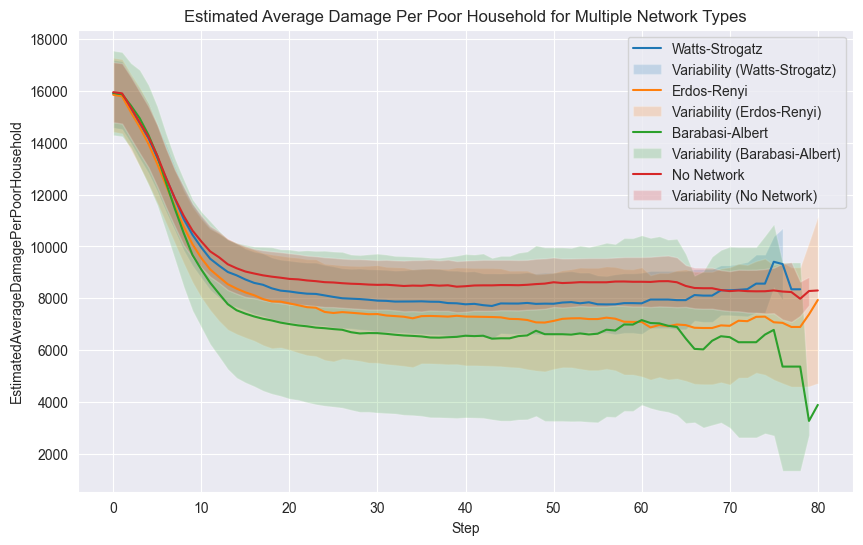

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean and standard deviation for each step in the "watts_strogatz" DataFrame
mean_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].mean()
std_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the "erdos_renyi" DataFrame
mean_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].mean()
std_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the "barabasi_albert" DataFrame
mean_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].mean()
std_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].std()

# Calculate the mean and standard deviation for each step in the "no_network" DataFrame
mean_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].mean()
std_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerPoorHousehold'].std()

# Plot the mean line for the "watts_strogatz" DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the "watts_strogatz" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the "erdos_renyi" DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the "erdos_renyi" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the "barabasi_albert" DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the "barabasi_albert" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the "no_network" DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the "no_network" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageDamagePerPoorHousehold')
ax.set_title('Estimated Average Damage Per Poor Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()

# MiddleClass

In [8]:
#First, the income to damage ratio for middle class households get isolated from the dataframe from before
estimated_ratio_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageIncomeToDamageMiddleClassHousehold']]
estimated_ratio_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageIncomeToDamageMiddleClassHousehold']]
estimated_ratio_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageIncomeToDamageMiddleClassHousehold']]
estimated_ratio_no_network = no_network[['RunId', 'Step', 'EstimatedAverageIncomeToDamageMiddleClassHousehold']]

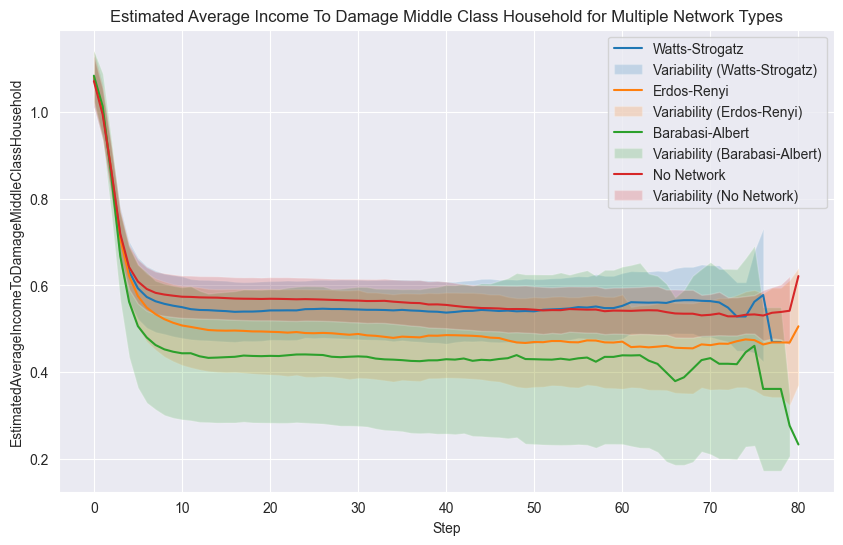

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean and standard deviation for each step in the "watts_strogatz" DataFrame
mean_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].mean()
std_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the "erdos_renyi" DataFrame
mean_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].mean()
std_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the "barabasi-albert" DataFrame
mean_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].mean()
std_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the "no_network" DataFrame
mean_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].mean()
std_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamageMiddleClassHousehold'].std()

# Plot the mean line for the "watts_strogatz" DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the "watts_strogatz" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the "erdos_renyi" DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the "erdos_renyi" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the "barabasi-albert" DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the "barabasi-albert" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the "no_network" DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the "no_network" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageIncomeToDamageMiddleClassHousehold')
ax.set_title('Estimated Average Income To Damage Middle Class Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()


In [10]:
#Second, the average damage per household with poor as income class is isolated
estimated_damage_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageDamagePerMiddleClassHousehold']]
estimated_damage_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageDamagePerMiddleClassHousehold']]
estimated_damage_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageDamagePerMiddleClassHousehold']]
estimated_damage_no_network = no_network[['RunId', 'Step', 'EstimatedAverageDamagePerMiddleClassHousehold']]

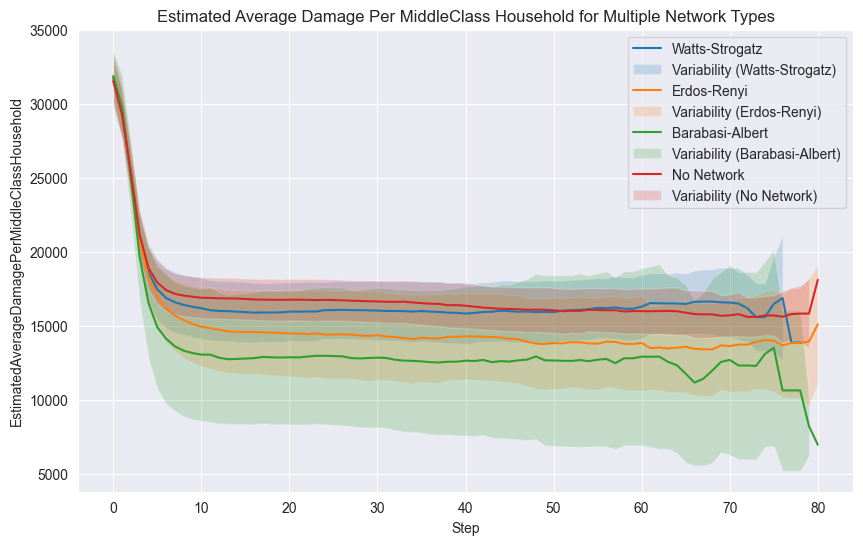

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean and standard deviation for each step in the "watts_strogatz" DataFrame
mean_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].mean()
std_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the "erdos_renyi" DataFrame
mean_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].mean()
std_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the "barabasi_albert" DataFrame
mean_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].mean()
std_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].std()

# Calculate the mean and standard deviation for each step in the "no_network" DataFrame
mean_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].mean()
std_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerMiddleClassHousehold'].std()

# Plot the mean line for the "watts_strogatz" DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the "watts_strogatz" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the "erdos_renyi" DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the "erdos_renyi" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the "barabasi_albert" DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the "barabasi_albert" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the "no_network" DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the "no_network" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageDamagePerMiddleClassHousehold')
ax.set_title('Estimated Average Damage Per MiddleClass Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()

# Rich

In [12]:
#First, the income to damage ratio for rich households get isolated from the dataframe from before
estimated_ratio_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageIncomeToDamageRichHousehold']]
estimated_ratio_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageIncomeToDamageRichHousehold']]
estimated_ratio_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageIncomeToDamageRichHousehold']]
estimated_ratio_no_network = no_network[['RunId', 'Step', 'EstimatedAverageIncomeToDamageRichHousehold']]

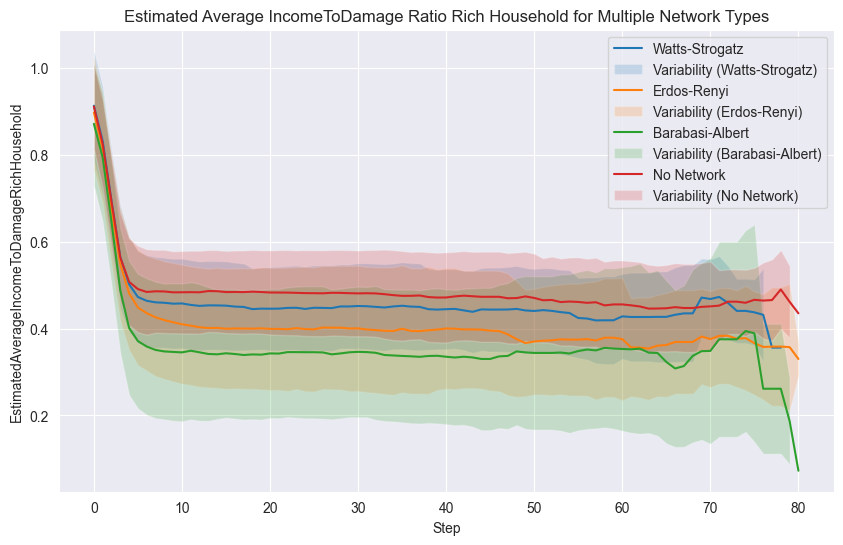

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean and standard deviation for each step in the "watts_strogatz" DataFrame
mean_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].mean()
std_values_watts_strogatz = estimated_ratio_watts_strogatz.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the "erdos_renyi" DataFrame
mean_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].mean()
std_values_erdos_renyi = estimated_ratio_erdos_renyi.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the "barabasi_albert" DataFrame
mean_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].mean()
std_values_barbasi_albert = estimated_ratio_barbasi_albert.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the "no_network" DataFrame
mean_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].mean()
std_values_no_network = estimated_ratio_no_network.groupby('Step')['EstimatedAverageIncomeToDamageRichHousehold'].std()

# Plot the mean line for the "watts_strogatz" DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the "watts_strogatz" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the "erdos_renyi" DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the "erdos_renyi" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the "barabasi_albert" DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the "barabasi_albert" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the "no_network" DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the "no_network" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageIncomeToDamageRichHousehold')
ax.set_title('Estimated Average IncomeToDamage Ratio Rich Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()

In [14]:
#Second, the average damage per household with rich as income class is isolated
estimated_damage_watts_strogatz = watts_strogatz[['RunId', 'Step', 'EstimatedAverageDamagePerRichHousehold']]
estimated_damage_erdos_renyi = erdos_renyi[['RunId', 'Step', 'EstimatedAverageDamagePerRichHousehold']]
estimated_damage_barbasi_albert = barabasi_albert[['RunId', 'Step', 'EstimatedAverageDamagePerRichHousehold']]
estimated_damage_no_network = no_network[['RunId', 'Step', 'EstimatedAverageDamagePerRichHousehold']]

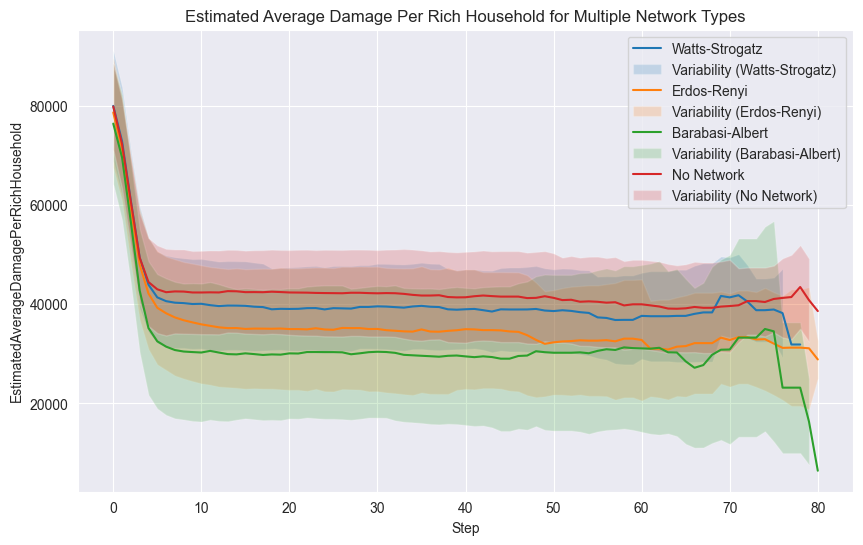

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean and standard deviation for each step in the "watts_strogatz" DataFrame
mean_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].mean()
std_values_watts_strogatz = estimated_damage_watts_strogatz.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the "erdos_renyi" DataFrame
mean_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].mean()
std_values_erdos_renyi = estimated_damage_erdos_renyi.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the "barabasi_albert" DataFrame
mean_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].mean()
std_values_barbasi_albert = estimated_damage_barbasi_albert.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].std()

# Calculate the mean and standard deviation for each step in the "no_network" DataFrame
mean_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].mean()
std_values_no_network = estimated_damage_no_network.groupby('Step')['EstimatedAverageDamagePerRichHousehold'].std()

# Plot the mean line for the "watts_strogatz" DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the "watts_strogatz" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the "erdos_renyi" DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the "erdos_renyi" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the "barabasi_albert" DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the "barabasi_albert" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the "no_network" DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the "no_network" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('EstimatedAverageDamagePerRichHousehold')
ax.set_title('Estimated Average Damage Per Rich Household for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()


# Adapted Households

In [16]:
adapted_households_watts_strogatz = watts_strogatz[['RunId', 'Step', 'TotalAdaptedHouseholds']]
adapted_households_erdos_renyi = erdos_renyi[['RunId', 'Step', 'TotalAdaptedHouseholds']]
adapted_households_barbasi_albert = barabasi_albert[['RunId', 'Step', 'TotalAdaptedHouseholds']]
adapted_households_no_network = no_network[['RunId', 'Step', 'TotalAdaptedHouseholds']]

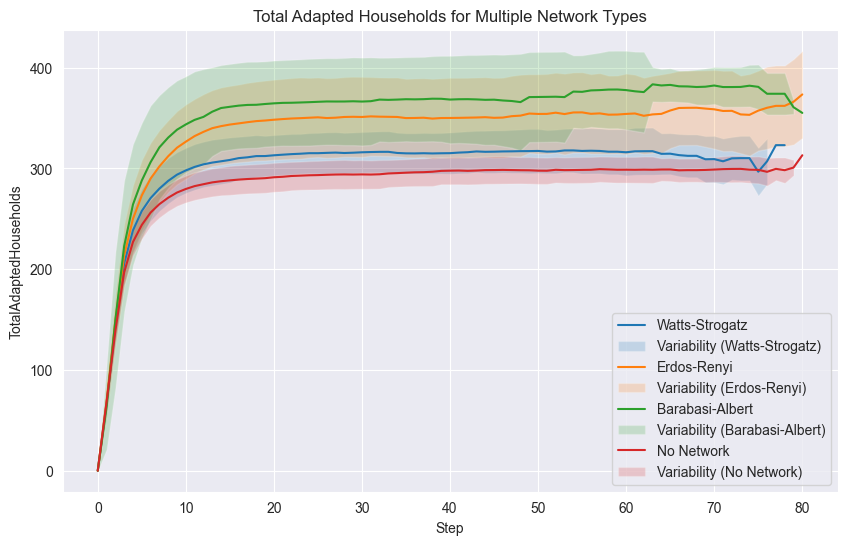

In [17]:

fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the mean and standard deviation for each step in the "watts_stogratz" DataFrame
mean_values_watts_strogatz = adapted_households_watts_strogatz.groupby('Step')['TotalAdaptedHouseholds'].mean()
std_values_watts_strogatz = adapted_households_watts_strogatz.groupby('Step')['TotalAdaptedHouseholds'].std()

# Calculate the mean and standard deviation for each step in the "erdos_renyi" DataFrame
mean_values_erdos_renyi = adapted_households_erdos_renyi.groupby('Step')['TotalAdaptedHouseholds'].mean()
std_values_erdos_renyi = adapted_households_erdos_renyi.groupby('Step')['TotalAdaptedHouseholds'].std()

# Calculate the mean and standard deviation for each step in the "barabasi_albert" DataFrame
mean_values_barbasi_albert = adapted_households_barbasi_albert.groupby('Step')['TotalAdaptedHouseholds'].mean()
std_values_barbasi_albert = adapted_households_barbasi_albert.groupby('Step')['TotalAdaptedHouseholds'].std()

# Calculate the mean and standard deviation for each step in the "no_network" DataFrame
mean_values_no_network = adapted_households_no_network.groupby('Step')['TotalAdaptedHouseholds'].mean()
std_values_no_network = adapted_households_no_network.groupby('Step')['TotalAdaptedHouseholds'].std()

# Plot the mean line for the "watts_stogratz" DataFrame
ax.plot(mean_values_watts_strogatz.index, mean_values_watts_strogatz, label='Watts-Strogatz')

# Fill between the upper and lower bounds for the "watts_stogratz" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_watts_strogatz.index, mean_values_watts_strogatz - std_values_watts_strogatz, mean_values_watts_strogatz + std_values_watts_strogatz, alpha=0.2, label='Variability (Watts-Strogatz)')

# Plot the mean line for the "erdos_renyi" DataFrame
ax.plot(mean_values_erdos_renyi.index, mean_values_erdos_renyi, label='Erdos-Renyi')

# Fill between the upper and lower bounds for the "erdos_renyi" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_erdos_renyi.index, mean_values_erdos_renyi - std_values_erdos_renyi, mean_values_erdos_renyi + std_values_erdos_renyi, alpha=0.2, label='Variability (Erdos-Renyi)')

# Plot the mean line for the "barabasi_albert" DataFrame
ax.plot(mean_values_barbasi_albert.index, mean_values_barbasi_albert, label='Barabasi-Albert')

# Fill between the upper and lower bounds for the "barabasi_albert" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_barbasi_albert.index, mean_values_barbasi_albert - std_values_barbasi_albert, mean_values_barbasi_albert + std_values_barbasi_albert, alpha=0.2, label='Variability (Barabasi-Albert)')

# Plot the mean line for the "no_network" DataFrame
ax.plot(mean_values_no_network.index, mean_values_no_network, label='No Network')

# Fill between the upper and lower bounds for the "no_network" DataFrame (mean ± 1 standard deviation)
ax.fill_between(mean_values_no_network.index, mean_values_no_network - std_values_no_network, mean_values_no_network + std_values_no_network, alpha=0.2, label='Variability (No Network)')

# Customize labels and title
ax.set_xlabel('Step')
ax.set_ylabel('TotalAdaptedHouseholds')
ax.set_title('Total Adapted Households for Multiple Network Types')

# Show legend
ax.legend()

# Display the plot
plt.show()



### One-way ANOVA test for Adapted Households and Total Actual Damage
Because the decision to adapt is strongly dependent on the flood perception of a Household, the network perception is equally important. Using the different network forming principles, every agent gets different "friends". To test of the difference between the networks is significant, a One-way ANOVA test is applied.

In [18]:
from scipy.stats import f_oneway
#Define a new dataframe by copying the initial dataframe
end_values = sensitivity_analysis.copy()
#Filter the copied initial dataframe for all the row that have a value in the TotalActualDamage column
#These rows give the end results of a run when a flood has occurred, so show the end of all the iterations
only_end_values = end_values[end_values['TotalActualDamage'] != 0]
only_end_values

,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,TotalAdaptedHouseholds,TotalActualDamage,TotalExpectedDamage,...,EstimatedAverageDamagePerRichHousehold,EstimatedAverageIncomeToDamagePoorHousehold,EstimatedAverageIncomeToDamageMiddleClassHousehold,EstimatedAverageIncomeToDamageRichHousehold,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
56,0,0,56,1000,80,100yr,watts_strogatz,352,1.513472e+07,1.622010e+07,...,43403.257320,1.472745,0.547813,0.487633,6905.038560,15066.114277,40492.978148,1.362110,0.512072,0.454936
122,1,0,65,1000,80,100yr,erdos_renyi,313,1.377484e+07,1.473295e+07,...,20903.013127,1.761716,0.533059,0.237741,8116.836507,14997.230216,19108.448434,1.623982,0.502190,0.217331
129,2,0,6,1000,80,100yr,barabasi_albert,321,1.195450e+07,1.265214e+07,...,30481.283223,1.952175,0.348833,0.340301,9628.368990,9811.793228,28990.446256,1.850712,0.328086,0.323656
162,3,0,32,1000,80,100yr,no_network,257,1.493420e+07,1.588000e+07,...,40033.653326,1.757500,0.494524,0.472161,8409.129337,13697.712251,38198.298203,1.657702,0.461781,0.450515
206,4,1,43,1000,80,100yr,watts_strogatz,323,1.358067e+07,1.444993e+07,...,35970.061538,1.729264,0.460972,0.405288,7882.462494,12486.598449,33780.862467,1.634988,0.432759,0.380621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16698,395,98,5,1000,80,100yr,no_network,211,1.744555e+07,1.877378e+07,...,42794.805483,2.827937,0.590864,0.488267,13027.703608,16189.690445,40032.291794,2.604371,0.549600,0.456748
16753,396,99,54,1000,80,100yr,watts_strogatz,326,1.731370e+07,1.854011e+07,...,55314.686981,1.671944,0.529456,0.649289,8155.749777,14438.666902,52647.069755,1.571128,0.487368,0.617976
16815,397,99,61,1000,80,100yr,erdos_renyi,406,1.122677e+07,1.217305e+07,...,30823.141890,0.935398,0.424865,0.365846,4435.621192,11547.416073,28715.050886,0.860237,0.390577,0.340824
16855,398,99,39,1000,80,100yr,barabasi_albert,384,1.620172e+07,1.751369e+07,...,50122.110995,1.874525,0.549433,0.582033,8438.965405,15002.446267,46459.096379,1.697617,0.510344,0.539497


In [19]:
#First, we gather all the runs with "watts_strogatz" network as condition in to a separate dataframe
watts_strogatz_end = pd.DataFrame()
condition = only_end_values['network'] == "watts_strogatz"
watts_strogatz_end = pd.concat([only_end_values[condition], watts_strogatz_end], ignore_index=True)

#Second, all the runs with "erdos_renyi" network as a condition in to a separate dataframe
erdos_renyi_end = pd.DataFrame()
condition = only_end_values['network'] == "erdos_renyi"
erdos_renyi_end = pd.concat([only_end_values[condition], erdos_renyi_end], ignore_index=True)

#Third, all the runs with "barabasi_albert" network as a condition in to a separate dataframe
barabasi_albert_end = pd.DataFrame()
condition = only_end_values['network'] == "barabasi_albert"
barabasi_albert_end = pd.concat([only_end_values[condition], barabasi_albert_end], ignore_index=True)

#Last, all the runs with "no_network" as a condition in to a separate dataframe
no_network_end = pd.DataFrame()
condition = only_end_values['network'] == "no_network"
no_network_end = pd.concat([only_end_values[condition], no_network_end], ignore_index=True)


In [20]:
#Convert the column TotalAdaptedHouseholds for each network_type into a list
watts_strogatz_end_adapted_households = watts_strogatz_end['TotalAdaptedHouseholds'].tolist()
erdos_renyi_end_adapted_households = erdos_renyi_end['TotalAdaptedHouseholds'].tolist()
barabasi_albert_end_adapted_households = barabasi_albert_end['TotalAdaptedHouseholds'].tolist()
no_network_end_adapted_households = no_network_end['TotalAdaptedHouseholds'].tolist()

In [21]:
#Perform a one way ANOVA Test on these list to see if there are significant differences
f_oneway(watts_strogatz_end_adapted_households, erdos_renyi_end_adapted_households, barabasi_albert_end_adapted_households, no_network_end_adapted_households)

F_onewayResult(statistic=31.476310574811, pvalue=2.870528301302581e-18)

The results are elaborated on further in the report.

In [22]:
#Convert the column TotalActualDamage for each network_type into a list
watts_strogatz_end_actual_damage = watts_strogatz_end['TotalActualDamage'].tolist()
erdos_renyi_end_actual_damage  = erdos_renyi_end['TotalActualDamage'].tolist()
barabasi_albert_end_actual_damage  = barabasi_albert_end['TotalActualDamage'].tolist()
no_network_end_actual_damage  = no_network_end['TotalActualDamage'].tolist()

In [23]:
#Perform a one way ANOVA Test on these list to see if there are significant differences
f_oneway(watts_strogatz_end_actual_damage, erdos_renyi_end_actual_damage, barabasi_albert_end_actual_damage, no_network_end_actual_damage)

F_onewayResult(statistic=17.58856732782612, pvalue=9.738664130992115e-11)

The results are elaborated on further in the report.